# Using ELATE as a Python library offline

Welcome to [ELATE](https://progs.coudert.name/elate), the online tool for analysis of elastic tensors, developed by Romain Gaillac and [François-Xavier Coudert](https://www.coudert.name) at CNRS / Chimie ParisTech.

The software is available as a web app at https://progs.coudert.name/elate.
ELATE is [open source software](https://github.com/coudertlab/elate), available at https://github.com/coudertlab/elate. If you use the software in published results (paper, conference, etc.), please cite the [corresponding paper: _J. Phys. Condens. Matter_, **2016**, _28_, 275201](https://doi.org/10.1088/0953-8984/28/27/275201).

**This notebook demonstrates how to use ELATE as a library, offline, from Python code.** You will find examples below to analyze second-order elastic tensors, draw 2D and 3D plots, export data as files, etc.

In [1]:
# Importe the ELATE Python module
import elastic

In [2]:
# We will use some basic scientific Python modules for plotting
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import numpy as np
import pandas as pd

%matplotlib widget

## Providing an elastic tensor as input

The main object in the ELATE library is the `Elastic` object, which stores a second-order elastic tensor and contains all the functions to analyze it and calculate derived properties.

For a 3D material, the tensor is input as a 6×6 symmetric matrix of elastic constants, either in full or in triangular form (upper or lower). It can be input as a multi-line string, or as an array (a list of list). It should be in units of GPa.

In [3]:
tensor_string = """
  228.384   85.741   81.503    0.000   -0.737    0.000 
    0.000  217.475   94.201    0.000  -20.213    0.000 
    0.000    0.000  178.811    0.000   -9.472    0.000 
    0.000    0.000    0.000   35.094    0.000  -17.851 
    0.000    0.000    0.000    0.000   37.778    0.000 
    0.000    0.000    0.000    0.000    0.000   42.708 
"""

In [4]:
# Tensor for our first example material, a pure-silica NSI zeolite (calculated by DFT)
material1 = elastic.Elastic(tensor_string)

In [5]:
tensor_array = [
  [  358.94 ,  214.65 ,  184.58 ,       0 ,       0 ,       0  ],
  [  214.65 ,  358.94 ,  184.58 ,       0 ,       0 ,       0  ],
  [  184.58 ,  184.58 ,  619.22 ,       0 ,       0 ,       0  ],
  [       0 ,       0 ,       0 ,  161.49 ,       0 ,       0  ],
  [       0 ,       0 ,       0 ,       0 ,  161.49 ,       0  ],
  [       0 ,       0 ,       0 ,       0 ,       0 ,  276.56  ]]


In [6]:
# Tensor for our second example material, TiO2 rutile (tetragonal phase)
material2 = elastic.Elastic(tensor_array)

In [7]:
type(material2)

elastic.Elastic

## Plotting directional properties: Young's modulus, linear compressibility

The first property we're going to look at is the Young's modulus. It is a directional property, meaning it depends on one direction in space, represented either by a unit vector **a**, or two angles (θ, φ). ELATE has functions to work with the second representation, so you can specify the two angles of your choice.

In [8]:
# (theta = π/2, phi = 0) is the x axis
material2.Young_2(np.pi / 2, 0)

220.07632665286772

So the Young's modulus (generally denoted with the symbol _E_) is 220 GPa for this material along the _x_ axis. We can do the same thing for another directional quantity, called the linear compressibility (or LC), which also depends on the same two angles:

In [9]:
# (theta = π/2, phi = π/4) is the (1 1 0) crystallographic axis
material2.LC_2(np.pi / 2, np.pi / 4)

1.5142201292356783

So the linear compressibility (denoted as _β_) is 1.51 TPa<sup>–1</sup>. Note that the unit of linear compressibility is different, it's the inverse of a pressure, and ELATE has transformed it for you into the conventional unit for reporting linear compressibility, which is TPa<sup>–1</sup>.

We can now plot these properties in 2D or 3D. Because 2D plots are easier to visualize, we start with those: let's plot the Young's modulus in the (_xy_), (_xz_) and (_yz_) planes.

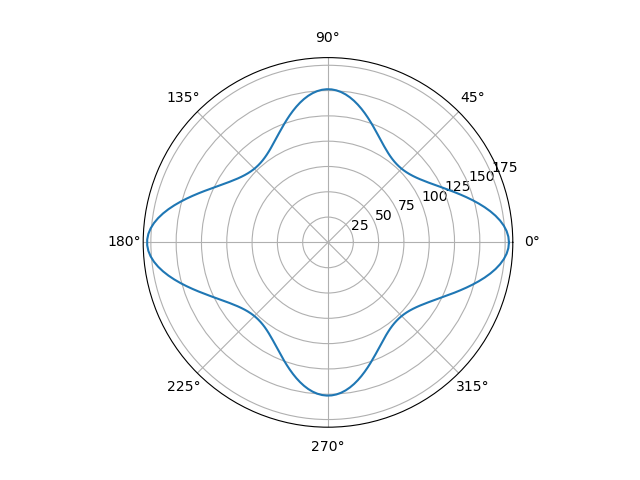

In [10]:
# The (xy) plane has theta = π/2 and phi is variable
# We can make a polar plot of the Young's modulus
phi = np.linspace(0, 2 * np.pi, 200)
f = np.vectorize(material1.Young_2)
r = f(np.pi / 2, phi)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(phi, r)
ax.grid(True)

plt.show()

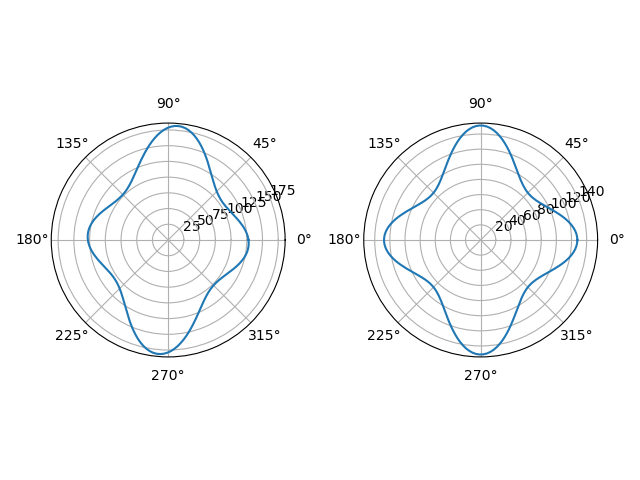

In [11]:
# The (xz) plane has phi = 0 and theta is variable
# The (yz) plane has phi = π/2 and theta is variable
theta = np.linspace(0, 2*np.pi, 200)
f = np.vectorize(material1.Young_2)
r_xz = f(theta, 0)
r_yz = f(theta, np.pi/2)

fig, ax = plt.subplots(1, 2, subplot_kw={'projection': 'polar'})
plt.tight_layout()
ax[0].plot(phi, r_xz)
ax[1].plot(phi, r_yz)

plt.show()

This is a very basic plot, and Matplotlib experts will find all the options to make it nicer: after fewer grid lines and tick marks, and some axis labels, etc. Depending on your taste, you can also plot the data in regular 2D format, not as a polar plot:

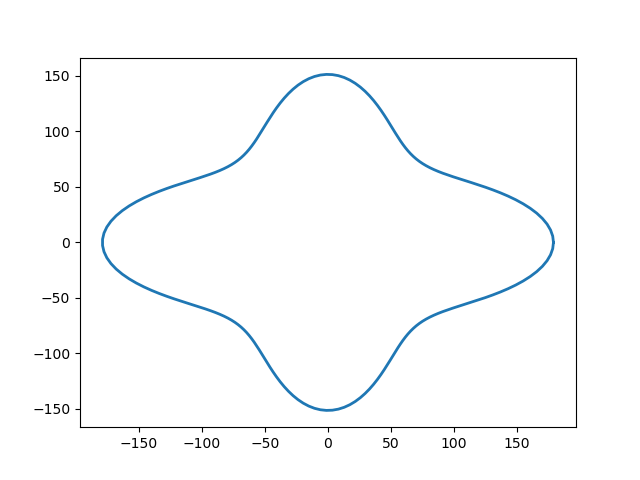

In [12]:
# The (xy) plane has theta = π/2 and phi is variable
# We can make a 2D plot of the Young's modulus in the (xy) plane
phi = np.linspace(0, 2 * np.pi, 200)
f = np.vectorize(material1.Young_2)
r = f(np.pi / 2, phi)

x = r * np.cos(phi)
y = r * np.sin(phi)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)
plt.show()

Notebooks are not the best way to demonstrate 3D plots, but it is possible to do so (and it will be interactive if you have Jupyter Lab installed):

In [13]:
def spherical_grid(npoints = 100):
    theta = np.linspace(0, np.pi, npoints)
    phi = np.linspace(0, 2 * np.pi, npoints)
    return np.meshgrid(theta, phi)

def spherical_coord(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

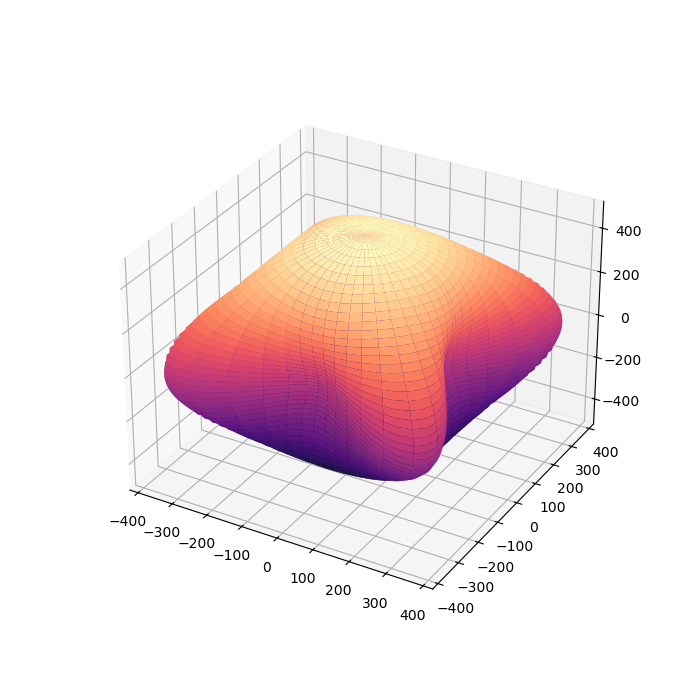

In [14]:
f = np.vectorize(material2.Young_2)
theta, phi = spherical_grid()
r = f(theta, phi)
x, y, z = spherical_coord(r, theta, phi)

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.plot_surface(x, y, z, cmap='magma')

plt.show()

We can also, of course, export all the data for this 3D surface into a file, so it can be read and plotted into a more sophisticated software for 3D visualization.

In [15]:
df = pd.DataFrame({"x": x.flatten(), "y": y.flatten(), "z": z.flatten()})
df.to_csv('surface_Young.csv')

All the formats of Pandas are supported, so you can export to CSV or Excel, or manipulate the data further to your needs.

In [16]:
df.to_excel('surface_Young.xlsx', index=False)

## Average properties

From a given elastic tensor, we can also obtain some average (nondirectional) properties for a polycristalline material. Three averaging schemes exist:
- Voigt, or iso-strain average
- Reuss, or iso-stress average
- Hill average, sometimes also called Voigt–Reuss–Hill average

For each scheme, we can calculate four properties:
- bulk modulus (units of GPa)
- Young’s modulus (units of GPa)
- shear modulus (units of GPa)
- Poisson’s ratio (dimensionless)

One function called `averages()` returns all 12 values:

In [17]:
avg_Voigt, avg_Reuss, avg_Hill = material2.averages()

In [18]:
# For the Voigt averaging scheme, we will get in this order:
# bulk modulus, Young's modulus, shear modulus, Poisson's ratio
avg_Voigt

[278.30222222222227, 423.98698386986575, 170.1273333333333, 0.2460871970500501]

In [19]:
# Function that will turn the numerical values into a nice Pandas dataframe
def averages_dataframe(mat):
    return pd.DataFrame(mat.averages(),
                        columns=["bulk (GPa)", "Young (GPa)", "shear (GPa)", "Poisson"],
                        index=["Voigt", "Reuss", "Hill"])

averages_dataframe(material2)

,bulk (GPa),Young (GPa),shear (GPa),Poisson
Voigt,278.302222,423.986984,170.127333,0.246087
Reuss,267.333681,357.881820,140.138961,0.276882
Hill,272.817952,391.241837,155.133147,0.260987


In this case, the tensor is relatively isotropic and therefore the averages are close to each other. For crystals with highly asymmetric mechanical properties, the averages can differ much more, as we will see here on the example of metal-organic framework MIL-53:

In [20]:
# Elastic tensor for MIL-53, from https://doi.org/10.1103/PhysRevLett.109.195502
# An example of tensor input in upper triangular form
tensor_MIL53 = """
90.85   20.41   54.28    0.00    0.00    0.00 
        65.56   12.36    0.00    0.00    0.00 
                33.33    0.00    0.00    0.00 
                         7.24    0.00    0.00 
                                39.52    0.00 
                                         8.27
"""

MIL53 = elastic.Elastic(tensor_MIL53)
averages_dataframe(MIL53)

,bulk (GPa),Young (GPa),shear (GPa),Poisson
Voigt,40.426667,46.684240,17.852000,0.307535
Reuss,5.019409,4.216582,1.550224,0.359991
Hill,22.723038,25.477628,9.701112,0.313129


Something else we can have a look at is the mechanical stability of the material. The rule is: given an elastic tensor, the corresponding material is stable if and only if all the eigenvalues of the tensor are positive. If you are interested in details, you can see [“Necessary and sufficient elastic stability conditions in various crystal systems”, F. Mouhat and F.-X. Coudert, _Phys. Rev. B_, **2014**, 90 (22), 224104.”](https://doi.org/10.1103/PhysRevB.90.224104)

In [21]:
def elasticEigenvalues(mat):
    return np.sort(np.linalg.eig(mat.CVoigt)[0])

print(elasticEigenvalues(MIL53))

if np.all(elasticEigenvalues(MIL53) > 0):
    print('The material is mechanically stable')

[  0.66146677   7.24         8.27        39.52        57.00092757
 132.07760566]
The material is mechanically stable


So the MIL-53 crystal is stable, and its lowest elastic tensor eigenvalue is at 0.66 GPa: it corresponds to its softest mode of deformation.

## Higher-dimensional properties: shear modulus, Poisson's ratio

We now turn to properties that are of a higher dimension that the Young's modulus and linear compressibility. The shear modulus _G_ and Poisson’s ratio _ν_ are not as straightforward to represent: they depend on two orthogonal unit vectors **a** and **b** (respectively the direction of the stress applied and the direction of measurement), or alternatively by three angles, _θ_, _φ_ and _χ_.

The functions that calculate shear modulus and Poisson's ratio are called `shear()` and `Poisson()`.

In [22]:
# Shear modulus for theta = phi = chi = 0. In units of GPa.
MIL53.shear([0., 0., 0.])

39.52

In [23]:
# Poisson's ratio for theta = phi = 0 and chi = π/3. Dimensionless.
MIL53.Poisson([0., 0., np.pi/3])

0.15125226870541428

Because they depend on 3 angles, shear modulus and Poisson's ratio cannot be represented as surfaces in 3D space. ELATE can however calculate, for given values of _θ_ and _φ_, the minimal and maximal values of each quantity taken over _χ_. The functions

## 2D materials

ELATE is also capable (since November 2023) of handling elastic properties of 2D materials. The elastic tensor for those is a 3×3 symmetric matrix of elastic constants, and it is given in units of N/m.

In [24]:
# Tensor for δ-phosphorene
tensor_2D = """
     88.64   -23.71        0  
    -23.71   149.21        0  
         0        0     24.5  
"""

In [25]:
# The class this time is called Elastic2D
mat2D = elastic.Elastic2D(tensor_2D)
mat2D.is2D()

True

The Young's modulus is a function of one angle, _θ_, so we can make a plot:

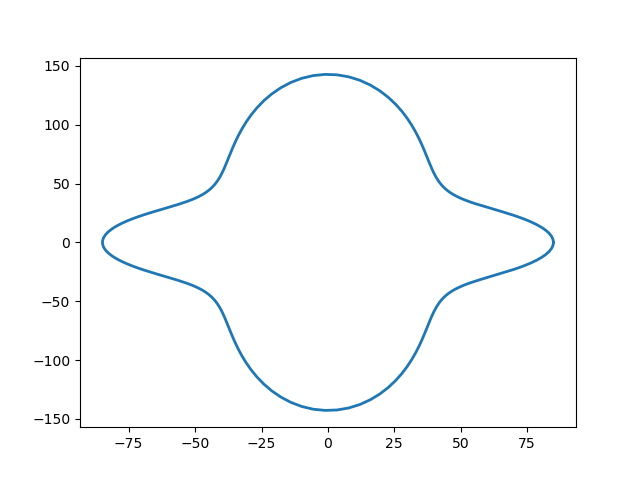

In [26]:
theta = np.linspace(0, 2 * np.pi, 200)
f = np.vectorize(mat2D.Young)
r = f(theta)

x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)
plt.show()

The same is true of the shear modulus:

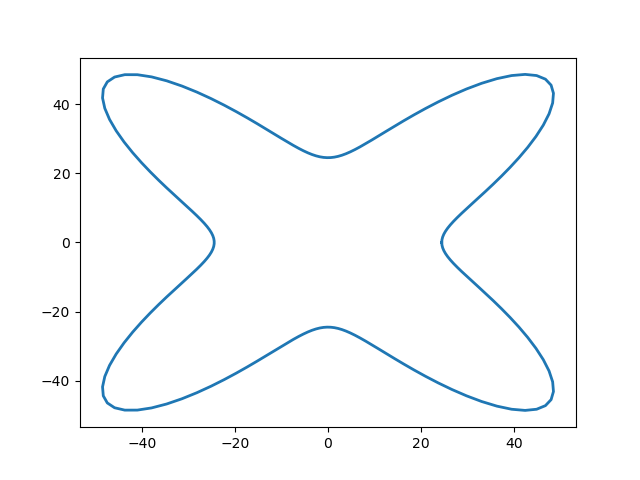

In [27]:
theta = np.linspace(0, 2 * np.pi, 200)
f = np.vectorize(mat2D.shear)
r = f(theta)

x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)
plt.show()

And the Poisson's ratio:

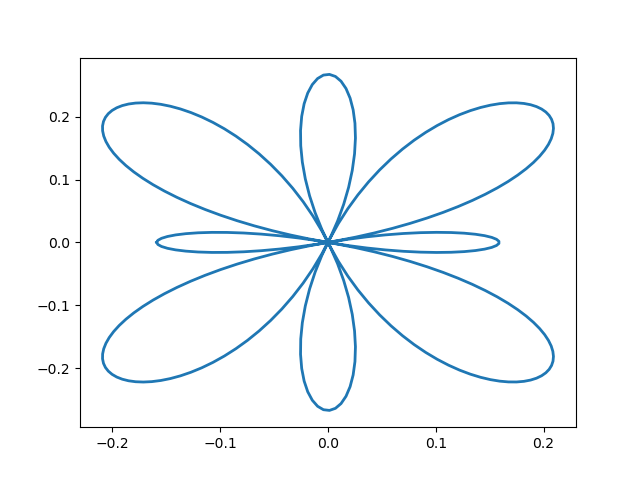

In [28]:
theta = np.linspace(0, 2 * np.pi, 300)
f = np.vectorize(mat2D.Poisson)
r = f(theta)

x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)
plt.show()

But the Poisson's ratio can be negative, so it's not clear when you plot which parts correspond to positive values, and which parts are the negative values. We can plot it so the positive is in green, and the negative is in red:

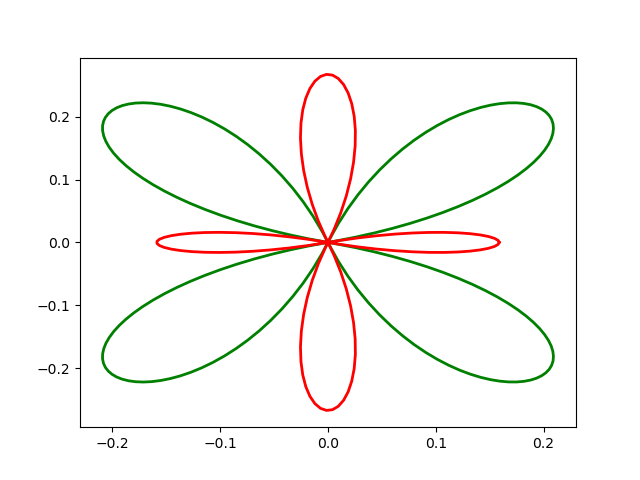

In [29]:
theta = np.linspace(0, 2 * np.pi, 300)
f = np.vectorize(mat2D.Poisson)

r1 = np.fmax(f(theta), 0)
x1 = r1 * np.cos(theta)
y1 = r1 * np.sin(theta)

r2 = -np.fmin(f(theta), 0)
x2 = r2 * np.cos(theta)
y2 = r2 * np.sin(theta)

fig, ax = plt.subplots()
ax.plot(x1, y1, linewidth=2.0, color='g')
ax.plot(x2, y2, linewidth=2.0, color='r')
plt.show()